In [1]:
import glob
from PIL import Image, ImageTk
import numpy as np 
from tkinter import filedialog, Label
import pandas as pd 
import tkinter as tk
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from keras.optimizers import Adam
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2 as cv

In [25]:
To_train = glob.glob('E:/scratch_DATA/Train/Tomato Data/*.jpg')
Or_train = glob.glob('E:/scratch_DATA/Train/orange train/*.jpg')
To_test = glob.glob('E:/scratch_DATA/Test/Tomato test/*.jpg')
Or_test = glob.glob('E:/scratch_DATA/Test/Orange test/*.jpg')

To_Aug = glob.glob('E:/scratch_DATA/Train/Tomato Data/*.png')
Or_Aug = glob.glob('E:/scratch_DATA/Train/orange train/*.png')

ToTest_Aug = glob.glob('E:/scratch_DATA/Test/Tomato test/*.png')
OrTest_Aug = glob.glob('E:/scratch_DATA/Test/Orange test/*.png')

len(To_train), len(Or_train), len(To_test), len(Or_test), len(To_Aug), len(Or_Aug), len(ToTest_Aug), len(OrTest_Aug)

(75, 83, 30, 26, 785, 871, 253, 223)

In [4]:
x_train = []
y_train = []
x_test  = []
y_test  = []

for path in tqdm(To_train):
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if(img.shape == (227,227,3)):
        x_train.append(np.array(img))
        y_train.append(0)
        
for path in tqdm(Or_train):
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if(img.shape == (227,227,3)):
        x_train.append(np.array(img))
        y_train.append(1) 
        

for path in tqdm(To_test):
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if(img.shape == (227,227,3)):
        x_test.append(np.array(img))
        y_test.append(0)
        
for path in tqdm(Or_test):
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if(img.shape == (227,227,3)):
        x_test.append(np.array(img))
        y_test.append(1) 
        
        
for path in tqdm(To_Aug):
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if(img.shape == (227,227,3)):
        x_train.append(np.array(img))
        y_train.append(0)
        
for path in tqdm(Or_Aug):
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if(img.shape == (227,227,3)):
        x_train.append(np.array(img))
        y_train.append(1) 
        
        
for path in tqdm(ToTest_Aug):
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if(img.shape == (227,227,3)):
        x_test.append(np.array(img))
        y_test.append(0)
        
for path in tqdm(OrTest_Aug):
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if(img.shape == (227,227,3)):
        x_test.append(np.array(img))
        y_test.append(1) 

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/785 [00:00<?, ?it/s]

  0%|          | 0/871 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/223 [00:00<?, ?it/s]

In [5]:
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train.shape, x_test.shape

((1814, 227, 227, 3), (532, 227, 227, 3))

In [7]:
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train.shape, y_test.shape

((1814,), (532,))

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1814, 227, 227, 3), (1814,), (532, 227, 227, 3), (532,))

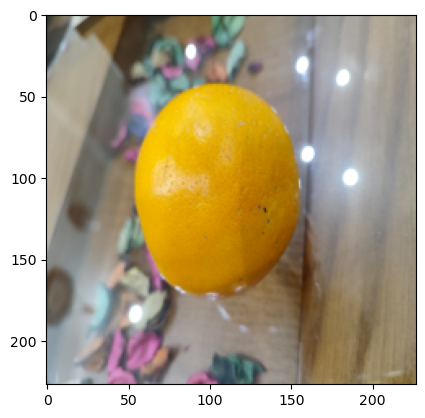

In [20]:
plt.imshow(x_train[83])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [20]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(227, 227, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/50
57/57 [==============================] - 92s 2s/step - loss: 4.3993 - accuracy: 0.8914 - val_loss: 20.4405 - val_accuracy: 0.5959 - lr: 0.0010
Epoch 2/50
57/57 [==============================] - 88s 2s/step - loss: 0.3626 - accuracy: 0.9768 - val_loss: 1.9640 - val_accuracy: 0.8891 - lr: 0.0010
Epoch 3/50
57/57 [==============================] - 87s 2s/step - loss: 0.3164 - accuracy: 0.9829 - val_loss: 6.4928 - val_accuracy: 0.9624 - lr: 0.0010
Epoch 4/50
57/57 [==============================] - 88s 2s/step - loss: 0.2008 - accuracy: 0.9884 - val_loss: 1.8127 - val_accuracy: 0.9605 - lr: 0.0010
Epoch 5/50
57/57 [==============================] - 87s 2s/step - loss: 0.1251 - accuracy: 0.9917 - val_loss: 1.7140 - val_accuracy: 0.9492 - lr: 0.0010
Epoch 6/50
57/57 [==============================] - 87s 2s/step - loss: 0.0901 - accuracy: 0.9967 - val_loss: 4.5618 - val_accuracy: 0.9398 - lr: 0.0010
Epoch 7/50
57/57 [==============================] - 87s 2s/step - loss: 0.1166 - 

In [26]:
model.save('mod.h5')

c:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model = load_model('mod.h5')

def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

def classify_image():
    global panelA, panelB
    path = filedialog.askopenfilename()
    if len(path) > 0:
        image = Image.open(path)
        image_for_display = ImageTk.PhotoImage(image)
        processed_image = preprocess_image(image, target_size=(227, 227))
        prediction = model.predict(processed_image).flatten()
        prediction_text = "Orange" if prediction[0] > 0.5 else "Tomato"
        
        if panelA is None or panelB is None:
            panelA = Label(image=image_for_display)
            panelA.image = image_for_display
            panelA.pack(side="left", padx=10, pady=10)
            
            panelB = Label(text=prediction_text)
            panelB.pack(side="right", padx=10, pady=10)
        else:
            panelA.configure(image=image_for_display)
            panelA.image = image_for_display
            panelB.configure(text=prediction_text)

root = tk.Tk()
panelA = None
panelB = None

btn = tk.Button(root, text="Upload an image", command=classify_image)
btn.pack(side="bottom", fill="both", padx=10, pady=10)

root.mainloop()

1/1 [==============================] - 0s 167ms/step
